In [1]:
import pandas as pd
from scipy import stats
from sklearn.linear_model import LogisticRegression

In [22]:
heart = pd.read_csv("D:\datascience math\heart.csv")

In [23]:
heart.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [24]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [26]:
heart.shape

(303, 14)

In [30]:
#heart.drop(["chol"],inplace=True,axis = 1)
heart.drop(["age"],inplace=True,axis = 1)
heart.drop(["trestbps"],inplace=True,axis = 1)

In [31]:
heart.drop(["thalach"],inplace=True,axis = 1)

In [ ]:
heart.drop(["chol"],inplace=True,axis = 1)

In [41]:
heart.drop(["oldpeak"],inplace=True,axis = 1)

In [42]:
heart.dropna()
heart.shape

(303, 9)

In [43]:
# Dividing our data into input and output variables 
X = heart.iloc[:,1:]
Y = heart.iloc[:,0]

In [44]:
#Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

In [45]:
#Predict for X dataset
y_pred = classifier.predict(X)

In [46]:
y_pred_df= pd.DataFrame({'actual': Y,
                         'predicted_prob': classifier.predict(X)})

In [47]:
y_pred_df

,actual,predicted_prob
0,1,0
1,1,0
2,0,1
3,1,1
4,0,1
...,...,...
298,0,1
299,1,1
300,1,1
301,1,1


In [48]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[ 18  78]
 [ 16 191]]


In [49]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.53      0.19      0.28        96
           1       0.71      0.92      0.80       207

    accuracy                           0.69       303
   macro avg       0.62      0.56      0.54       303
weighted avg       0.65      0.69      0.64       303



Text(0, 0.5, 'True Positive Rate')

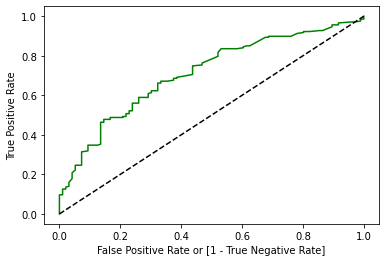

In [50]:
#roc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])

auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='green', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
